## Penjelasan Dataset yang Digunakan

### 1. Kasus yang Diambil
Dataset ini berisi koleksi SMS (pesan teks) yang telah dilabeli sebagai spam atau ham (bukan spam). 
Dataset digunakan untuk membangun model klasifikasi teks yang dapat membedakan antara pesan spam dan pesan legitimate.

**Sumber Dataset:** UCI Machine Learning Repository - SMS Spam Collection
**Link Kaggle:** https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
**Jumlah Data:** 5,574 pesan SMS dalam bahasa Inggris

### 2. Penjelasan Kolom
Dataset memiliki 2 kolom utama:
- **v1 (label):** Label kategori pesan
  - `ham` = pesan normal/legitimate (bukan spam)
  - `spam` = pesan spam (iklan, penipuan, dll)
- **v2 (message):** Isi teks pesan SMS

**Contoh Data:**
- `ham`: "Go until jurong point, crazy.. Available only in bugis n great world la e buffet..."
- `spam`: "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005..."

In [2]:
# Import library untuk data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Import library untuk text processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import library untuk deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

print("✅ Semua library berhasil di-import!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Leira\AppData\Roaming\nltk_data...


✅ Semua library berhasil di-import!


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Leira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Lihat 5 baris pertama
print("=" * 50)
print("PREVIEW DATA:")
print("=" * 50)
df.head()


PREVIEW DATA:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Cek nama kolom
print("Kolom dalam dataset:")
print(df.columns.tolist())
print()

# Cek info dataset
print("=" * 50)
print("INFO DATASET:")
print("=" * 50)
df.info()


Kolom dalam dataset:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Understanding

Analisis mendalam tentang karakteristik dataset sebelum preprocessing.


In [5]:
# 1. JUMLAH BARIS DATA
print("=" * 70)
print("1. JUMLAH BARIS DATA")
print("=" * 70)
print(f"Total baris data: {len(df)} pesan")
print(f"Total kolom: {len(df.columns)} kolom")
print()

# Cek distribusi label
print("Distribusi Label:")
print(df['v1'].value_counts())
print()
print("Persentase:")
print(df['v1'].value_counts(normalize=True) * 100)


1. JUMLAH BARIS DATA
Total baris data: 5572 pesan
Total kolom: 5 kolom

Distribusi Label:
v1
ham     4825
spam     747
Name: count, dtype: int64

Persentase:
v1
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


In [6]:
# 2. PANJANG RATA-RATA SETIAP BARIS
print("=" * 70)
print("2. PANJANG RATA-RATA SETIAP BARIS")
print("=" * 70)

# Tambah kolom panjang teks
df['text_length'] = df['v2'].apply(len)
df['word_count'] = df['v2'].apply(lambda x: len(x.split()))

print("\nStatistik Panjang Teks (karakter):")
print(df['text_length'].describe())

print("\nStatistik Jumlah Kata:")
print(df['word_count'].describe())

# Panjang rata-rata per kategori
print("\nPanjang Rata-rata per Kategori:")
print(df.groupby('v1')[['text_length', 'word_count']].mean())


2. PANJANG RATA-RATA SETIAP BARIS

Statistik Panjang Teks (karakter):
count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: text_length, dtype: float64

Statistik Jumlah Kata:
count    5572.000000
mean       15.494436
std        11.329427
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: word_count, dtype: float64

Panjang Rata-rata per Kategori:
      text_length  word_count
v1                           
ham     71.023627   14.200622
spam   138.866131   23.851406


In [7]:
# 3. CEK DATA DUPLIKASI
print("=" * 70)
print("3. CEK DATA DUPLIKASI")
print("=" * 70)

# Cek total duplikasi
total_duplikasi = df.duplicated().sum()
print(f"Total baris duplikasi: {total_duplikasi}")

# Jika ada duplikasi, hapus
if total_duplikasi > 0:
    print("\n⚠️ Ada duplikasi! Menghapus duplikasi...")
    df_clean = df.drop_duplicates(subset=['v2'])
    print(f"Data setelah hapus duplikasi: {len(df_clean)} baris")
    print(f"Baris yang dihapus: {len(df) - len(df_clean)}")
    df = df_clean
else:
    print("\n✅ Tidak ada data duplikasi")


3. CEK DATA DUPLIKASI
Total baris duplikasi: 403

⚠️ Ada duplikasi! Menghapus duplikasi...
Data setelah hapus duplikasi: 5169 baris
Baris yang dihapus: 403


In [8]:
# 4. CEK DATA KOSONG
print("=" * 70)
print("4. CEK DATA KOSONG (MISSING VALUES)")
print("=" * 70)

# Cek missing values
print("Missing values per kolom:")
print(df.isnull().sum())
print()

# Cek data dengan teks kosong
empty_text = df[df['v2'].str.strip() == ''].shape[0]
print(f"Baris dengan teks kosong: {empty_text}")

if empty_text > 0:
    print("Menghapus data dengan teks kosong...")
    df = df[df['v2'].str.strip() != '']
    print(f"Data setelah pembersihan: {len(df)} baris")
else:
    print("✅ Tidak ada data kosong")


4. CEK DATA KOSONG (MISSING VALUES)
Missing values per kolom:
v1                0
v2                0
Unnamed: 2     5126
Unnamed: 3     5159
Unnamed: 4     5164
text_length       0
word_count        0
dtype: int64

Baris dengan teks kosong: 0
✅ Tidak ada data kosong


5. DISTRIBUSI DATA DENGAN VISUALISASI


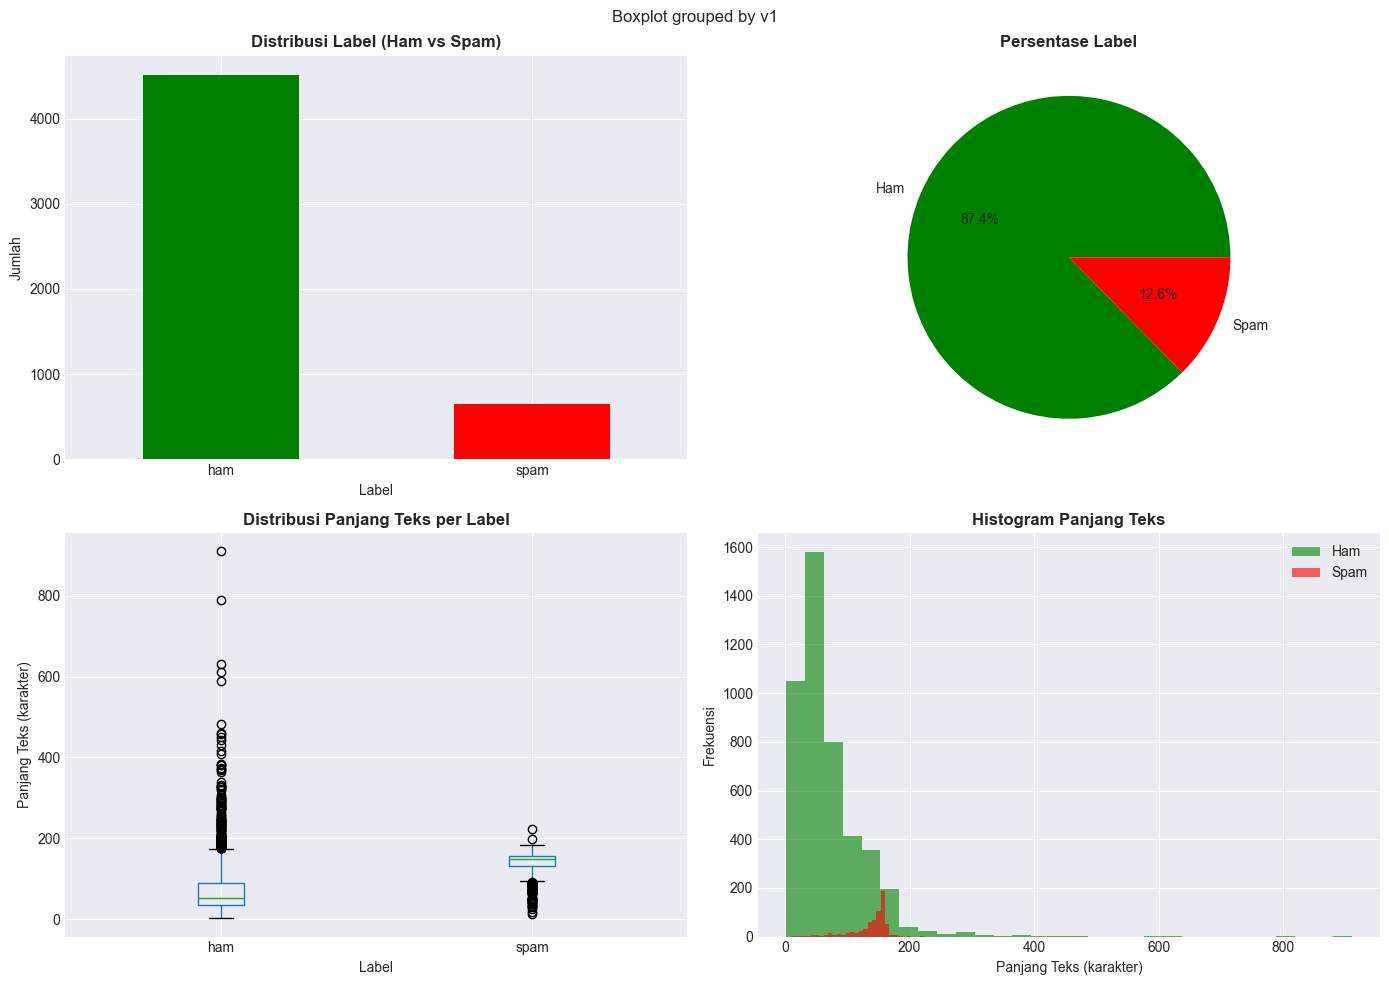


✅ Visualisasi selesai!


In [9]:
# 5. DISTRIBUSI DATA MENGGUNAKAN VISUALISASI
print("=" * 70)
print("5. DISTRIBUSI DATA DENGAN VISUALISASI")
print("=" * 70)

# Setup plot style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribusi Label
df['v1'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Distribusi Label (Ham vs Spam)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Label')
axes[0, 0].set_ylabel('Jumlah')
axes[0, 0].tick_params(axis='x', rotation=0)

# Plot 2: Persentase Label
df['v1'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', 
                              colors=['green', 'red'], labels=['Ham', 'Spam'])
axes[0, 1].set_title('Persentase Label', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('')

# Plot 3: Distribusi Panjang Teks
df.boxplot(column='text_length', by='v1', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Panjang Teks per Label', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Panjang Teks (karakter)')

# Plot 4: Histogram Panjang Teks
axes[1, 1].hist(df[df['v1'] == 'ham']['text_length'], bins=30, alpha=0.6, label='Ham', color='green')
axes[1, 1].hist(df[df['v1'] == 'spam']['text_length'], bins=30, alpha=0.6, label='Spam', color='red')
axes[1, 1].set_title('Histogram Panjang Teks', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Panjang Teks (karakter)')
axes[1, 1].set_ylabel('Frekuensi')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi selesai!")


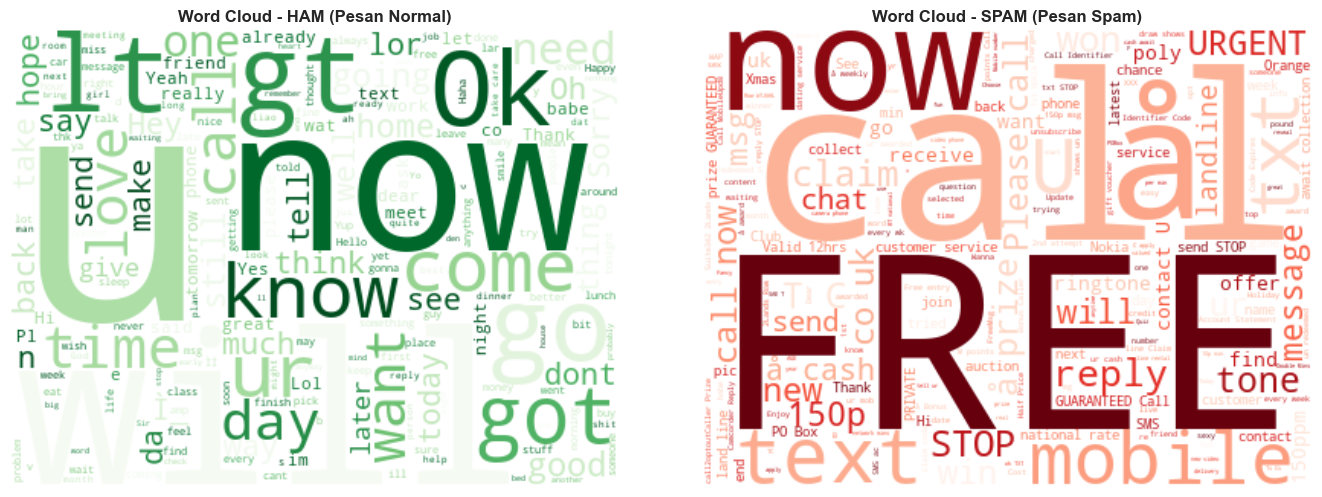


✅ Word Cloud selesai!


In [10]:
# Word Cloud - Kata yang Sering Muncul
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# WordCloud untuk HAM
ham_text = ' '.join(df[df['v1'] == 'ham']['v2'].values)
wc_ham = WordCloud(width=400, height=300, background_color='white', colormap='Greens').generate(ham_text)
axes[0].imshow(wc_ham, interpolation='bilinear')
axes[0].set_title('Word Cloud - HAM (Pesan Normal)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# WordCloud untuk SPAM
spam_text = ' '.join(df[df['v1'] == 'spam']['v2'].values)
wc_spam = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(spam_text)
axes[1].imshow(wc_spam, interpolation='bilinear')
axes[1].set_title('Word Cloud - SPAM (Pesan Spam)', fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Word Cloud selesai!")


## Data Text Processing

Preprocessing teks untuk persiapan modeling. Langkah-langkah:
1. Tokenisasi
2. Lemmatization & Stemming
3. Stopword Removal
4. Text Normalisasi
5. Matrix Correlation (opsional)
6. Labeling Data
7. Text Vektorisasi
8. Data Splitting


In [11]:
# FUNGSI PREPROCESSING TEXT
print("=" * 70)
print("LANGKAH 1-5: TEXT PREPROCESSING")
print("=" * 70)

# Inisialisasi tools
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Fungsi untuk membersihkan teks dengan tahapan:
    1. Lowercase
    2. Hapus URL
    3. Hapus mention dan hashtag
    4. Hapus punctuation
    5. Hapus whitespace berlebih
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Hapus mention (@user) dan hashtag (#topic)
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # 4. Hapus punctuation dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 5. Hapus whitespace berlebih
    text = ' '.join(text.split())
    
    return text

def preprocess_text(text):
    """
    Fungsi untuk tokenisasi, lemmatisasi, stemming, dan stopword removal
    """
    # Tokenisasi
    tokens = word_tokenize(text)
    
    # Lemmatisasi dan hapus stopword
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Stemming (optional - bisa dihapus jika performa kurang)
    # tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(tokens)

# Terapkan preprocessing ke dataset
print("\n⏳ Membersihkan teks... (ini akan memakan waktu beberapa saat)")
df['v2_clean'] = df['v2'].apply(clean_text)
print("✅ Pembersihan teks selesai!")

print("\n⏳ Preprocessing teks (tokenisasi, lemmatisasi, stopword)...")
df['v2_processed'] = df['v2_clean'].apply(preprocess_text)
print("✅ Preprocessing selesai!")

# Tampilkan contoh
print("\n" + "=" * 70)
print("CONTOH SEBELUM DAN SESUDAH PREPROCESSING:")
print("=" * 70)
idx = 0
print(f"\nOriginal:\n{df['v2'].iloc[idx]}")
print(f"\nAfter Clean:\n{df['v2_clean'].iloc[idx]}")
print(f"\nAfter Preprocessing:\n{df['v2_processed'].iloc[idx]}")


LANGKAH 1-5: TEXT PREPROCESSING

⏳ Membersihkan teks... (ini akan memakan waktu beberapa saat)
✅ Pembersihan teks selesai!

⏳ Preprocessing teks (tokenisasi, lemmatisasi, stopword)...
✅ Preprocessing selesai!

CONTOH SEBELUM DAN SESUDAH PREPROCESSING:

Original:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

After Clean:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat

After Preprocessing:
go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [12]:
# LANGKAH 6: TEXT VEKTORISASI
print("=" * 70)
print("LANGKAH 6: TEXT VEKTORISASI MENGGUNAKAN TFIDF")
print("=" * 70)

# Gunakan TfidfVectorizer untuk konversi teks ke numerik
vectorizer = TfidfVectorizer(
    max_features=5000,      # Ambil 5000 kata teratas
    ngram_range=(1, 2),     # Unigram dan bigram
    min_df=2,               # Kata harus muncul minimal 2 kali
    max_df=0.8,             # Kata tidak boleh muncul di >80% dokumen
    stop_words='english'
)

# Fit dan transform data
X = vectorizer.fit_transform(df['v2_processed'])
print(f"\n✅ Vektorisasi selesai!")
print(f"Dimensi matrix: {X.shape}")
print(f"Jumlah features (kata unik): {X.shape[1]}")

# Label encoding (spam=1, ham=0)
y = (df['v1'] == 'spam').astype(int)
print(f"\nLabel distribution:")
print(y.value_counts())


LANGKAH 6: TEXT VEKTORISASI MENGGUNAKAN TFIDF

✅ Vektorisasi selesai!
Dimensi matrix: (5169, 5000)
Jumlah features (kata unik): 5000

Label distribution:
v1
0    4516
1     653
Name: count, dtype: int64


In [13]:
# LANGKAH 7: DATA SPLITTING
print("=" * 70)
print("LANGKAH 7: DATA SPLITTING")
print("=" * 70)

# Pilih salah satu split ratio
# Rekomendasi: 0.8 (80% train, 20% test)
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size,
    random_state=random_state,
    stratify=y  # Jaga perbandingan label di train dan test
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train/Test ratio: {test_size}")
print()

print("Class distribution di Train set:")
print(f"  Ham: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"  Spam: {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

print("\nClass distribution di Test set:")
print(f"  Ham: {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"  Spam: {(y_test == 1).sum()} ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")


LANGKAH 7: DATA SPLITTING

Train set: 4135 samples
Test set: 1034 samples
Train/Test ratio: 0.2

Class distribution di Train set:
  Ham: 3613 (87.4%)
  Spam: 522 (12.6%)

Class distribution di Test set:
  Ham: 903 (87.3%)
  Spam: 131 (12.7%)


## Data Modeling

Menggunakan Deep Learning untuk klasifikasi spam/ham:
- **Model 1: Bidirectional LSTM** - Menangkap konteks dua arah dalam urutan teks
- **Model 2: CNN 1D** - Mendeteksi pola lokal dalam teks

Keuntungan Deep Learning:
- Lebih baik dalam menangkap dependensi jangka panjang
- Otomatis belajar fitur yang relevan
- Performance biasanya lebih tinggi dari machine learning tradisional


In [16]:
# PERSIAPAN DATA UNTUK DEEP LEARNING (FIXED)
print("=" * 70)
print("PERSIAPAN DATA UNTUK DEEP LEARNING")
print("=" * 70)

# PENTING: Kita perlu split ulang karena data sudah berubah setelah cleaning
# Tokenisasi untuk deep learning
max_words = 5000
max_len = 100  # Panjang maksimal sequence

tokenizer_dl = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer_dl.fit_on_texts(df['v2_processed'])

# Konversi SEMUA teks ke sequence
X_sequences = tokenizer_dl.texts_to_sequences(df['v2_processed'])

# Pad sequences
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# Ambil label
y_labels = (df['v1'] == 'spam').astype(int).values

print(f"\n✅ Tokenisasi selesai!")
print(f"Vocabulary size: {len(tokenizer_dl.word_index)}")
print(f"Total data: {X_padded.shape[0]}")
print(f"Sequence length: {X_padded.shape[1]}")

# Split data untuk Deep Learning (split ulang yang benar)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_padded, y_labels,
    test_size=0.2,
    random_state=42,
    stratify=y_labels
)

print(f"\nTrain set: {X_train_dl.shape[0]} samples")
print(f"Test set: {X_test_dl.shape[0]} samples")

print("\nClass distribution di Train set:")
print(f"  Ham: {(y_train_dl == 0).sum()} ({(y_train_dl == 0).sum()/len(y_train_dl)*100:.1f}%)")
print(f"  Spam: {(y_train_dl == 1).sum()} ({(y_train_dl == 1).sum()/len(y_train_dl)*100:.1f}%)")

print("\nContoh sequence:")
print(f"Original: {df['v2_processed'].iloc[0][:100]}")
print(f"Sequence: {X_sequences[0][:20]}")


PERSIAPAN DATA UNTUK DEEP LEARNING

✅ Tokenisasi selesai!
Vocabulary size: 7810
Total data: 5169
Sequence length: 100

Train set: 4135 samples
Test set: 1034 samples

Class distribution di Train set:
  Ham: 3613 (87.4%)
  Spam: 522 (12.6%)

Contoh sequence:
Original: go jurong point crazy available bugis n great world la e buffet cine got amore wat
Sequence: [7, 3233, 253, 535, 569, 974, 43, 59, 319, 796, 86, 2217, 975, 13, 3234, 69]


In [18]:
# MODEL 1: BIDIRECTIONAL LSTM
print("\n" + "=" * 70)
print("MODEL 1: BIDIRECTIONAL LSTM (Bi-LSTM)")
print("=" * 70)

# Build model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(32, dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("\nModel Architecture:")
model_lstm.summary()

# Training 
print("\n⏳ Training Bi-LSTM Model...")
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(
    X_train_dl, y_train_dl,  # <-- INI YANG DIGANTI
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

print("\n✅ Training selesai!")



MODEL 1: BIDIRECTIONAL LSTM (Bi-LSTM)

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


⏳ Training Bi-LSTM Model...
Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.8978 - loss: 0.2925 - precision_1: 0.7500 - recall_1: 0.2986 - val_accuracy: 0.9698 - val_loss: 0.1065 - val_precision_1: 0.9213 - val_recall_1: 0.8200
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.9825 - loss: 0.0699 - precision_1: 0.9619 - recall_1: 0.8981 - val_accuracy: 0.9819 - val_loss: 0.0621 - val_precision_1: 0.9208 - val_recall_1: 0.9300
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - accuracy: 0.9903 - loss: 0.0382 - precision_1: 0.9688 - recall_1: 0.9550 - val_accuracy: 0.9867 - val_loss: 0.0554 - val_precision_1: 0.9684 - val_recall_1: 0.9200
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 142ms/step - accuracy: 0.9949 - loss: 0.0198 - precision_1: 0.9903 - recall_1: 0.9692 - val_accuracy: 0.9843 - val_loss: 0.0676 - val_precision_1: 0.9394 - val_recall_1: 0.9300
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - accuracy: 0.9964 - loss: 0.014

In [19]:
# MODEL 2: CNN 1D
print("\n" + "=" * 70)
print("MODEL 2: CONVOLUTIONAL NEURAL NETWORK (CNN 1D)")
print("=" * 70)

# Build model
model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("\nModel Architecture:")
model_cnn.summary()

# Training 
print("\n⏳ Training CNN Model...")
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = model_cnn.fit(
    X_train_dl, y_train_dl,  # <-- INI YANG DIGANTI
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

print("\n✅ Training selesai!")



MODEL 2: CONVOLUTIONAL NEURAL NETWORK (CNN 1D)

Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


⏳ Training CNN Model...
Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8875 - loss: 0.3510 - precision_2: 0.6953 - recall_2: 0.2109 - val_accuracy: 0.9770 - val_loss: 0.0859 - val_precision_2: 0.9175 - val_recall_2: 0.8900
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9764 - loss: 0.0944 - precision_2: 0.9300 - recall_2: 0.8815 - val_accuracy: 0.9794 - val_loss: 0.0676 - val_precision_2: 0.9192 - val_recall_2: 0.9100
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9915 - loss: 0.0438 - precision_2: 0.9876 - recall_2: 0.9455 - val_accuracy: 0.9794 - val_loss: 0.0711 - val_precision_2: 0.9109 - val_recall_2: 0.9200
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9949 - loss: 0.0272 - precision_2: 0.9903 - recall_2: 0.9692 - val_accuracy: 0.9794 - val_loss: 0.0817 - val_precision_2: 0.9029 - val_recall_2: 0.9300
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9958 - loss: 0.0237 - precision_

## Data Evaluasi

Evaluasi kedua model pada test set menggunakan:
1. Confusion Matrix
2. Classification Report (Precision, Recall, F1-Score)
3. Visualisasi Perbandingan Model


In [20]:
# EVALUASI MODEL BI-LSTM
print("=" * 70)
print("EVALUASI MODEL BI-LSTM PADA TEST SET")
print("=" * 70)

# Prediksi
y_pred_lstm_prob = model_lstm.predict(X_test_dl)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int).flatten()

# Classification Report
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test_dl, y_pred_lstm, 
                            target_names=['Ham', 'Spam'],
                            digits=4))

# Accuracy
accuracy_lstm = accuracy_score(y_test_dl, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.4f} ({accuracy_lstm*100:.2f}%)")

# Confusion Matrix
cm_lstm = confusion_matrix(y_test_dl, y_pred_lstm)
print(f"\nConfusion Matrix:")
print(cm_lstm)


EVALUASI MODEL BI-LSTM PADA TEST SET
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         Ham     0.9804    0.9967    0.9885       903
        Spam     0.9741    0.8626    0.9150       131

    accuracy                         0.9797      1034
   macro avg     0.9773    0.9296    0.9517      1034
weighted avg     0.9796    0.9797    0.9792      1034

Test Accuracy: 0.9797 (97.97%)

Confusion Matrix:
[[900   3]
 [ 18 113]]


In [21]:
# EVALUASI MODEL CNN
print("=" * 70)
print("EVALUASI MODEL CNN PADA TEST SET")
print("=" * 70)

# Prediksi
y_pred_cnn_prob = model_cnn.predict(X_test_dl)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int).flatten()

# Classification Report
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test_dl, y_pred_cnn, 
                            target_names=['Ham', 'Spam'],
                            digits=4))

# Accuracy
accuracy_cnn = accuracy_score(y_test_dl, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.4f} ({accuracy_cnn*100:.2f}%)")

# Confusion Matrix
cm_cnn = confusion_matrix(y_test_dl, y_pred_cnn)
print(f"\nConfusion Matrix:")
print(cm_cnn)


EVALUASI MODEL CNN PADA TEST SET
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         Ham     0.9803    0.9945    0.9874       903
        Spam     0.9576    0.8626    0.9076       131

    accuracy                         0.9778      1034
   macro avg     0.9690    0.9285    0.9475      1034
weighted avg     0.9775    0.9778    0.9773      1034

Test Accuracy: 0.9778 (97.78%)

Confusion Matrix:
[[898   5]
 [ 18 113]]


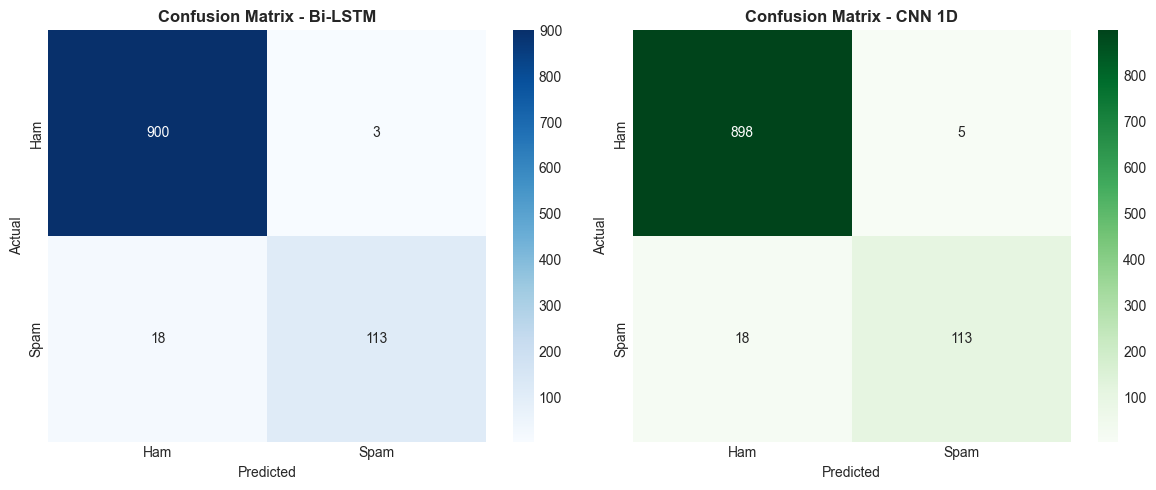

✅ Visualisasi Confusion Matrix selesai!


In [22]:
# VISUALISASI CONFUSION MATRIX
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix - LSTM
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[0].set_title('Confusion Matrix - Bi-LSTM', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Confusion Matrix - CNN
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[1].set_title('Confusion Matrix - CNN 1D', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print("✅ Visualisasi Confusion Matrix selesai!")


## Perbandingan Model

Perbandingan performa kedua model Deep Learning.


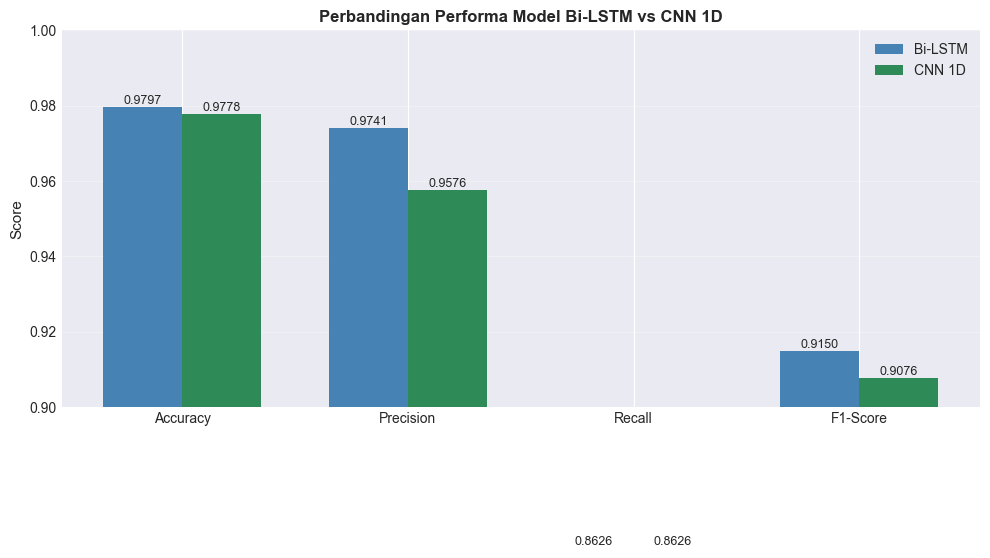


SUMMARY PERBANDINGAN MODEL

Metric          Bi-LSTM         CNN 1D          Winner         
----------------------------------------------------------------------
Accuracy        0.9797 (97.97%)    0.9778 (97.78%)    Bi-LSTM
Precision       0.9741           0.9576           Bi-LSTM
Recall          0.8626           0.8626           CNN 1D
F1-Score        0.9150           0.9076           Bi-LSTM

✅ Evaluasi dan perbandingan selesai!


In [23]:
# PERBANDINGAN MODEL
from sklearn.metrics import precision_score, recall_score, f1_score

# Hitung metrik
precision_lstm = precision_score(y_test_dl, y_pred_lstm)
recall_lstm = recall_score(y_test_dl, y_pred_lstm)
f1_lstm = f1_score(y_test_dl, y_pred_lstm)

precision_cnn = precision_score(y_test_dl, y_pred_cnn)
recall_cnn = recall_score(y_test_dl, y_pred_cnn)
f1_cnn = f1_score(y_test_dl, y_pred_cnn)

# Data untuk plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lstm_scores = [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]
cnn_scores = [accuracy_cnn, precision_cnn, recall_cnn, f1_cnn]

# Plot perbandingan
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, lstm_scores, width, label='Bi-LSTM', color='steelblue')
bars2 = ax.bar(x + width/2, cnn_scores, width, label='CNN 1D', color='seagreen')

ax.set_ylabel('Score', fontsize=11)
ax.set_title('Perbandingan Performa Model Bi-LSTM vs CNN 1D', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0.9, 1.0)  # Zoom ke range yang relevan
ax.grid(axis='y', alpha=0.3)

# Tambah nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "=" * 70)
print("SUMMARY PERBANDINGAN MODEL")
print("=" * 70)
print(f"\n{'Metric':<15} {'Bi-LSTM':<15} {'CNN 1D':<15} {'Winner':<15}")
print("-" * 70)
print(f"{'Accuracy':<15} {accuracy_lstm:.4f} ({accuracy_lstm*100:.2f}%){' ':<3} {accuracy_cnn:.4f} ({accuracy_cnn*100:.2f}%){' ':<3} {'Bi-LSTM' if accuracy_lstm > accuracy_cnn else 'CNN 1D'}")
print(f"{'Precision':<15} {precision_lstm:.4f}{' ':<10} {precision_cnn:.4f}{' ':<10} {'Bi-LSTM' if precision_lstm > precision_cnn else 'CNN 1D'}")
print(f"{'Recall':<15} {recall_lstm:.4f}{' ':<10} {recall_cnn:.4f}{' ':<10} {'Bi-LSTM' if recall_lstm > recall_cnn else 'CNN 1D'}")
print(f"{'F1-Score':<15} {f1_lstm:.4f}{' ':<10} {f1_cnn:.4f}{' ':<10} {'Bi-LSTM' if f1_lstm > f1_cnn else 'CNN 1D'}")
print("=" * 70)

print("\n✅ Evaluasi dan perbandingan selesai!")
